In [24]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [25]:
metabolomics_data = pd.read_csv("../../MCF7_removal/Metabolomics_data_noMCF7.csv")
metabolomics_data = metabolomics_data.set_index("ionIdx")
metabolomics_data = metabolomics_data.drop("ionMz", axis =1)

In [26]:
metabolomics_data

,1,2,3,4,5,6,7,8,9,10,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,10755,9608,9434,9720,8356,7814,8998,9164,6230,7931,...,6566,5004,6202,7946,5711,10677,6683,6125,5018,5627
2,3507,3938,3836,4311,4534,7250,2338,3386,1506,2998,...,1463,1281,2111,382,2691,1474,757,1059,2668,2061
3,61335,64959,78616,78619,58873,64141,61454,62215,42346,47793,...,33828,30939,41765,43246,33936,27913,22271,31315,67741,68680
4,4178,4586,5914,4963,4268,5809,3971,6174,4275,5218,...,4638,3525,3418,5450,4165,2648,7556,5147,5106,7744
5,4124,6969,11827,11233,3640,4308,5750,6529,4072,5716,...,2812,3423,1506,2841,2529,2642,2598,1084,3020,2301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2752,2993,1722,2304,2587,3685,6248,5451,3976,3969,...,1362,1450,3704,3702,3075,3057,3320,3018,1607,1351
1096,-286,-355,-348,167,-326,-357,557,814,683,380,...,677,979,1280,1354,524,182,1359,867,1535,1540
1097,1574,1171,1039,576,1868,1414,2668,1465,2089,1456,...,52,173,379,581,876,1130,181,288,204,164


In [27]:
celllines_mutations = pd.read_csv("../../../GEMICCL/Mutation.csv", sep = "\t")
celllines_mapped = pd.read_csv("../../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")

# Get only cell lines with ID
#celllines_mapped = celllines_mapped.drop_duplicates(subset = ["dsIdx"])
#celllines_mapped = celllines_mapped.dropna(subset = ["ID"])
#sample_data_tissue = celllines_mapped["DI"].tolist()

<ipython-input-27-08d79cb97eec>:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  celllines_mutations = pd.read_csv("../../../GEMICCL/Mutation.csv", sep = "\t")


In [28]:
celllines_mapped["ID"].value_counts()

MDA-MB-231     78
HCC1806        18
MIA PaCa-2     18
NCI-H441       18
SW780          12
               ..
NCI-H2009       4
NCI-H1975       4
RERF-LC-Sq1     4
HCC1143         4
NCIH460         2
Name: ID, Length: 173, dtype: int64

In [29]:
mapping_column = celllines_mapped[["dsIdx", "ID"]].set_index("dsIdx").T

In [30]:
mapping_column

dsIdx,1,2,3,4,5,6,7,8,9,10,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
ID,SHP-77,SHP-77,PC-9,PC-9,SHP-77,SHP-77,LUDLU-1,LUDLU-1,PC14PE6,PC14PE6,...,UO-31,UO-31,K-562,K-562,EKVX,EKVX,DU4475,DU4475,SF539,SF539


In [31]:
mapping_column.columns = mapping_column.columns.astype(int)
metabolomics_data.columns = metabolomics_data.columns.astype(int)

In [32]:
labelled_data = pd.concat([mapping_column, metabolomics_data])

In [33]:
labelled_data_celllines = labelled_data.T[labelled_data.T["ID"].notna()].T

In [34]:
labelled_data_celllines.head()

,1,2,3,4,5,6,7,8,9,10,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
ID,SHP-77,SHP-77,PC-9,PC-9,SHP-77,SHP-77,LUDLU-1,LUDLU-1,PC14PE6,PC14PE6,...,UO-31,UO-31,K-562,K-562,EKVX,EKVX,DU4475,DU4475,SF539,SF539
1,10755,9608,9434,9720,8356,7814,8998,9164,6230,7931,...,6566,5004,6202,7946,5711,10677,6683,6125,5018,5627
2,3507,3938,3836,4311,4534,7250,2338,3386,1506,2998,...,1463,1281,2111,382,2691,1474,757,1059,2668,2061
3,61335,64959,78616,78619,58873,64141,61454,62215,42346,47793,...,33828,30939,41765,43246,33936,27913,22271,31315,67741,68680
4,4178,4586,5914,4963,4268,5809,3971,6174,4275,5218,...,4638,3525,3418,5450,4165,2648,7556,5147,5106,7744


In [14]:
#labelled_data_celllines.columns = labelled_data_celllines.loc["ID"]
#labelled_data_celllines = labelled_data_celllines.drop("ID", axis =0)

In [35]:
#labelled_data_celllines.to_csv("../../MCF7_removal/Metabolomics_data_cellline_averaged.csv")

In [36]:
labelled_data_celllines.T

,ID,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
1,SHP-77,10755,3507,61335,4178,4124,3635,7436,6249,5869,...,3350,2867,3537,765,5016,2752,-286,1574,1166,1422
2,SHP-77,9608,3938,64959,4586,6969,10746,4955,3924,5895,...,2813,3004,3368,1338,4619,2993,-355,1171,1054,1700
3,PC-9,9434,3836,78616,5914,11827,8225,3932,3439,3896,...,2585,2780,2599,838,6795,1722,-348,1039,1466,1578
4,PC-9,9720,4311,78619,4963,11233,7902,2664,3453,4233,...,2064,3192,3097,513,7075,2304,167,576,1673,1832
5,SHP-77,8356,4534,58873,4268,3640,8438,3359,2247,11232,...,2439,3051,3806,764,7155,2587,-326,1868,1093,1829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,EKVX,10677,1474,27913,2648,2642,3252,2675,1925,2957,...,2578,3112,3687,1701,7205,3057,182,1130,1171,1520
1293,DU4475,6683,757,22271,7556,2598,10384,2910,2069,1963,...,3321,4542,3653,2811,7935,3320,1359,181,2374,2077
1294,DU4475,6125,1059,31315,5147,1084,4176,2525,2166,1638,...,3037,4383,3810,3523,8299,3018,867,288,2298,2411
1295,SF539,5018,2668,67741,5106,3020,2582,981,1156,2563,...,1806,3010,2695,1839,9844,1607,1535,204,1034,898


In [37]:
averaged = labelled_data_celllines.T.groupby(labelled_data_celllines.T['ID']).mean().T

<ipython-input-37-2c347d55928c>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  averaged = labelled_data_celllines.T.groupby(labelled_data_celllines.T['ID']).mean().T


In [74]:
averaged.head()

ID,184A1,5637,647V,769-P,786-O,97-7,A-427,A-498,A-549,A-704,...,SW780,SW900,T-47D,T24,UACC-257,UACC-62,UM-UC-3,UMC-11,UO-31,VM-CUB-1
1,9641.500000,9652.000000,7779.500000,8728.00,7988.000000,7403.000000,8140.000000,8648.333333,6116.333333,6978.00,...,7463.916667,7669.166667,6721.666667,8721.833333,10469.500000,7732.166667,7450.000000,6500.500000,7287.666667,7915.666667
2,2823.666667,2737.833333,1932.166667,1751.50,2362.750000,2758.333333,4261.333333,2354.833333,3149.000000,2305.25,...,2408.083333,3406.333333,2334.333333,2226.500000,2123.833333,3090.333333,2337.083333,2137.500000,2329.666667,2120.833333
3,75617.333333,52749.666667,46875.833333,48070.00,54990.666667,37741.166667,68280.333333,42423.166667,63936.833333,61717.25,...,53982.250000,49537.333333,35803.666667,47030.333333,46974.500000,58546.666667,49916.916667,59015.166667,35755.333333,86789.833333
4,5391.000000,4437.833333,4188.500000,4558.25,4857.250000,4100.666667,5185.500000,4461.500000,6154.166667,4527.50,...,4992.166667,4580.500000,4076.333333,5212.500000,9169.166667,4968.666667,5246.833333,6084.000000,4156.666667,7225.666667
5,5060.500000,6115.166667,6030.500000,5163.25,5229.833333,4678.333333,4926.166667,6457.500000,5044.500000,4038.00,...,4410.500000,4849.500000,3365.500000,4831.500000,3776.833333,4100.000000,4461.250000,4779.333333,3919.166667,3647.000000


In [173]:
#averaged.to_csv("../../MCF7_removal/Metabolomics_data_cellline_averaged.csv")

In [38]:
celllines_list = celllines_mapped["ID"].unique().tolist()
celllines_notinmutationset = set(celllines_list) - set(celllines_mutations['CellLineName_Cellosaurus'])
celllines_mapped_mutations = celllines_mapped[~celllines_mapped["ID"].isin(celllines_notinmutationset)]

In [39]:
celllines_withmutations = celllines_mutations[celllines_mutations["CellLineName_Cellosaurus"].isin(celllines_list)]
#celllines_withmutations.to_csv("./Mutations_in_celllines.csv")

In [40]:
celllines_mapped_mutations.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,dsIdx,sCode,sName,dsCode,dsPert,dsAmount,dsUser1,...,ID,OI,OX,RX,ST,SX,SY,TAG,WW,Tissue
0,0,0,0,1,S404286,Batch5_SHP77_2,20140917162616309-936809,Batch5_SHP77,31.0,Batch5_SHP77_2,...,SHP-77,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung
1,1,1,1,2,S404286,Batch5_SHP77_2,20140917162617937-936810,Batch5_SHP77,31.0,Batch5_SHP77_2,...,SHP-77,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung
4,4,4,4,5,S404285,Batch5_SHP77_1,20140917162626101-936815,Batch5_SHP77,31.0,Batch5_SHP77_1,...,SHP-77,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung
5,5,5,5,6,S404285,Batch5_SHP77_1,20140917162627751-936816,Batch5_SHP77,31.0,Batch5_SHP77_1,...,SHP-77,[],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=212181;', 'PubMed=3518877;', 'PubMed=...","['Source(s): ATCC; Cosmic-CLP; ECACC', 'Amelog...",Male,SHP77; Shadyside Hospital Pittsburgh-77,SHP77,['https://dtp.cancer.gov/discovery_development...,Lung
6,6,6,6,7,S404272,Batch5_LUDLU1_3,20140917162629329-936817,Batch5_LUDLU1,75.5,Batch5_LUDLU1_3,...,LUDLU-1,['CVCL_2296 ! AGLCL [Human 1989]'],['NCBI_TaxID=9606; ! Homo sapiens'],"['PubMed=2577272;', 'PubMed=20215515;', 'PubMe...","['Source(s): ECACC; PubMed=25877200', 'Ameloge...",Male,Ludlu-1; LUDLU 1; LUDLU1,LUDLU1,[],Lung


In [92]:
def querygenemetabolite(gene, metabolite, label = "2-hydroxyglutarate"):
    # Get celline ids with a mutation (non silent)
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"].notna()]
    gene_of_interest_celllines = set(gene_of_interest["CellLineName_Cellosaurus"])
    
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
#    cellines_with_mutation = list(set([str(x) for x in cellines_with_mutation]))
#    cellines_without_mutation = list(set([str(x) for x in cellines_without_mutation]))
    
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
  
    
    mutationdict = dict(zip(gene_of_interest["CellLineName_Cellosaurus"],gene_of_interest["AA_Mutation"]))
    celllines_mutated = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]
    mutation_aa = celllines_mutated["ID"].map(mutationdict)

    ## Get the metabolomics data
    mutated_celllines = averaged[cellines_with_mutation].transpose()
    nonmutated_celllines = averaged[cellines_without_mutation].transpose()
    
    mutated_celllines["Mutation"] = 1
    mutated_celllines["MutationAA"] = mutation_aa.values
    print(mutated_celllines[["MutationAA"]].drop_duplicates())
    nonmutated_celllines["Mutation"] = 0
    nonmutated_celllines["MutationAA"] = "WT"
    
    celllines_labeled = pd.concat([mutated_celllines, nonmutated_celllines])
    celllines_labeled.index = celllines_labeled.index.map(str)
    
    celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].unique()
    
    gene_ranked = celllines_labeled.sort_values(by =metabolite).reset_index()
    gene_ranked["index"] = gene_ranked.index
    mutationonly = gene_ranked[gene_ranked["Mutation"] == 1].drop_duplicates(subset = "ID")
    nomutation = gene_ranked[gene_ranked["Mutation"] == 0].drop_duplicates(subset = "ID")
        
    matplotlib.rcParams['figure.figsize'] = [3, 6]
    palette = sns.color_palette("Set3", 10)[3:]
    g1 = sns.swarmplot(y= np.log10(nomutation[metabolite]), color = "grey", zorder =1, size = 6)
    g = sns.swarmplot(y= np.log10(mutationonly[metabolite]), size = 10, hue = mutationonly["MutationAA"],
                  palette = palette, edgecolor = "k", linewidth= 2, zorder = 3, x=[""]*len(mutationonly))

    sns.despine()

    g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
    g.set_yticklabels(g.get_yticks(), size = 20)
    g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    g.set_xlabel(label, size = 20)
    g.set_title(gene, size = 22)
    g.legend(prop={"size":15}, frameon = False, markerscale = 1.5, bbox_to_anchor=(1.5, 0.6, 0.5, 0.5))
    savename = gene + "_" + label + "_averaged_mutations.png"
    plt.savefig(savename, dpi = 400, bbox_inches = "tight")
    plt.show()

        MutationAA
ID                
HCT 116    p.S261L
HCT 15      p.G97D


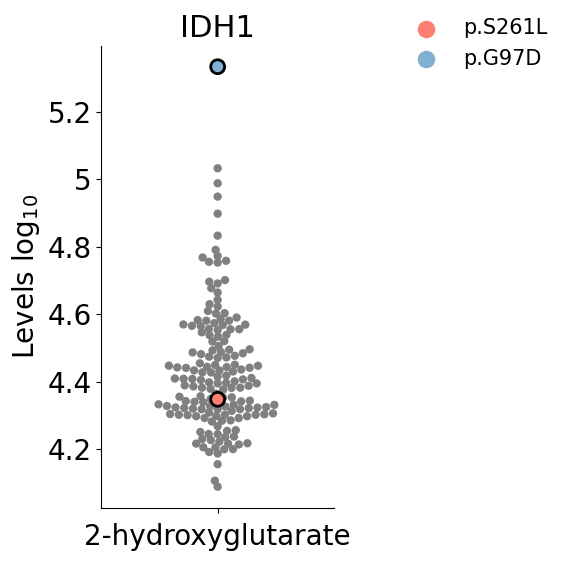

In [52]:
querygenemetabolite("IDH1", 118)

           MutationAA
ID                   
NCI-H727  p.N136fs*25


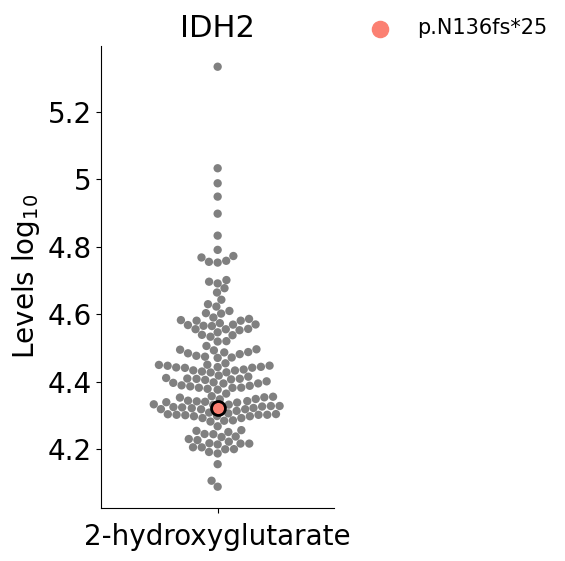

In [53]:
querygenemetabolite("IDH2", 118)

          MutationAA
ID                  
HOP-62       p.L318F
COR-L279      p.T87R
SN12C        p.R352Q
NCI-H510A    p.G448C
LOX-IMVI     p.D275H
SK-LU-1      p.Q614E
A-427        p.P658L
NCI-H23       p.A69T
CCRF-CEM     p.A488T


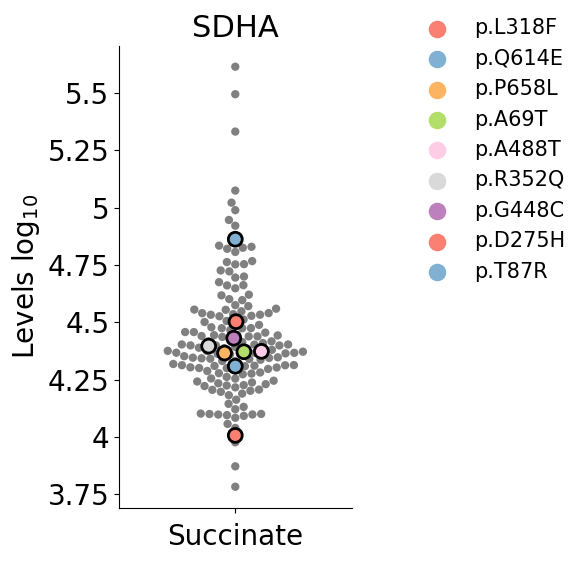

In [54]:
querygenemetabolite("SDHA", 65, "Succinate")

          MutationAA
ID                  
NCI-H2342    p.C253S


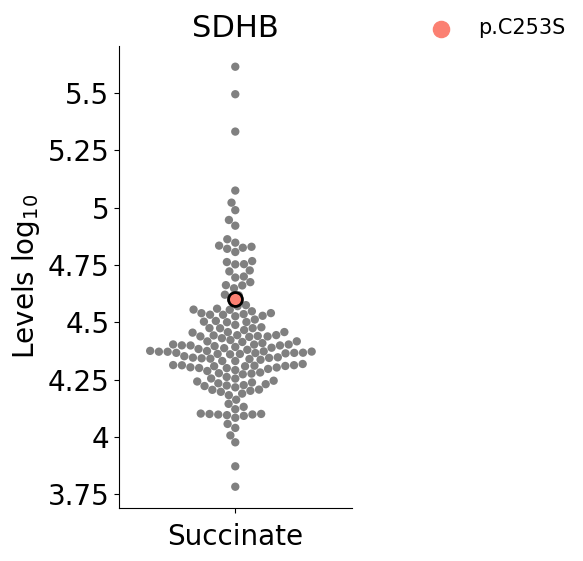

In [55]:
querygenemetabolite("SDHB", 65, "Succinate")

          MutationAA
ID                  
NCI-H1838     p.R50H
5637          p.L63V
NCI-H82       p.M87V


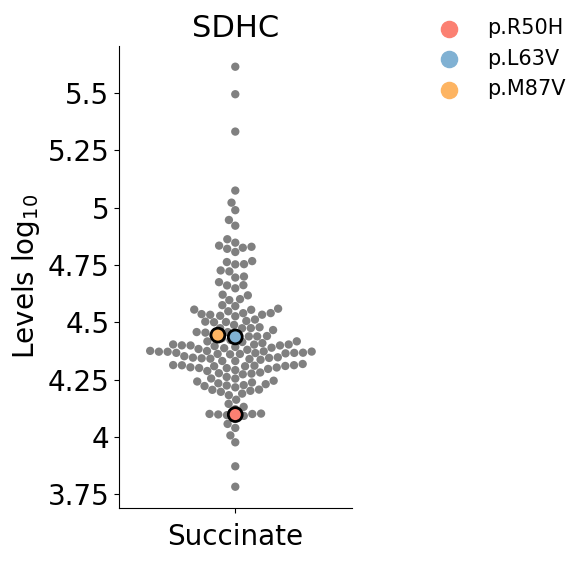

In [56]:
querygenemetabolite("SDHC", 65, "Succinate")

           MutationAA
ID                   
MOLT-4         p.R33H
MDA-MB-157     p.R18G


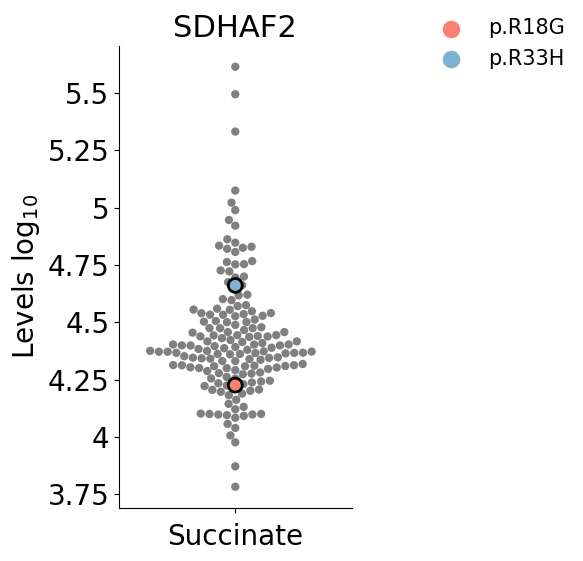

In [57]:
querygenemetabolite("SDHAF2", 65, "Succinate")

          MutationAA
ID                  
HOP-62       p.L318F
COR-L279      p.T87R
SN12C        p.R352Q
NCI-H510A    p.G448C
LOX-IMVI     p.D275H
SK-LU-1      p.Q614E
A-427        p.P658L
NCI-H23       p.A69T
CCRF-CEM     p.A488T


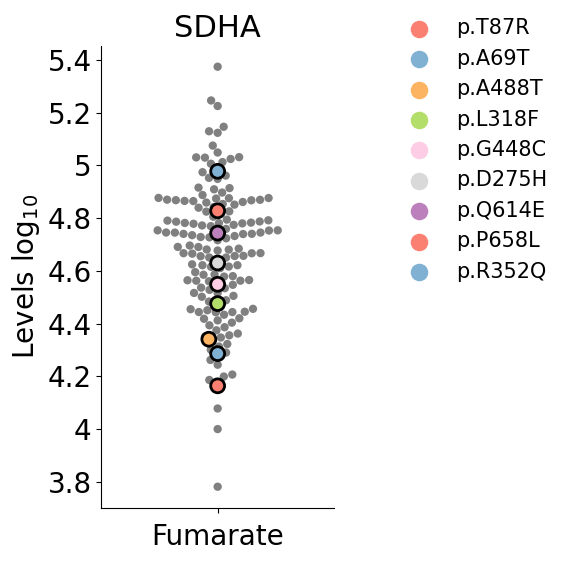

In [58]:
querygenemetabolite("SDHA", 59, "Fumarate")

          MutationAA
ID                  
NCI-H2342    p.C253S


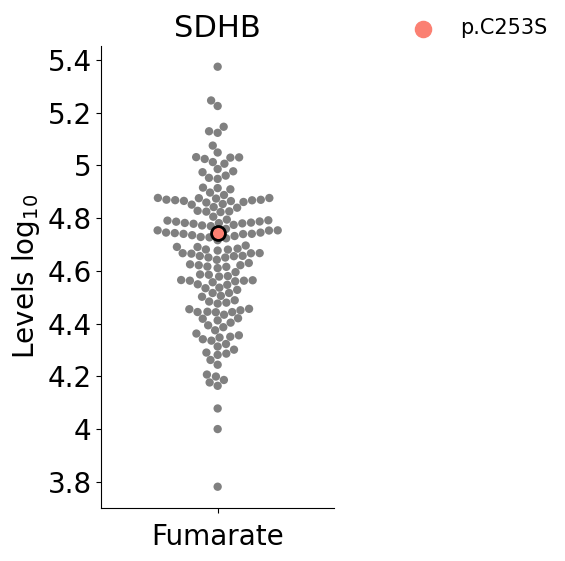

In [59]:
querygenemetabolite("SDHB", 59, "Fumarate")

          MutationAA
ID                  
NCI-H1838     p.R50H
5637          p.L63V
NCI-H82       p.M87V


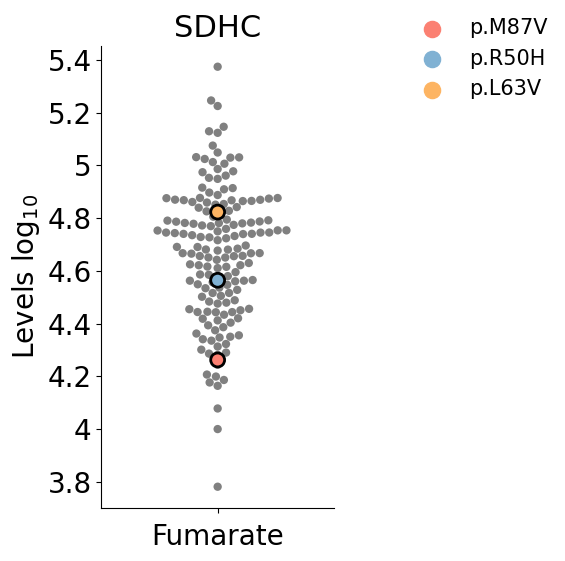

In [60]:
querygenemetabolite("SDHC", 59, "Fumarate")

           MutationAA
ID                   
MOLT-4         p.R33H
MDA-MB-157     p.R18G


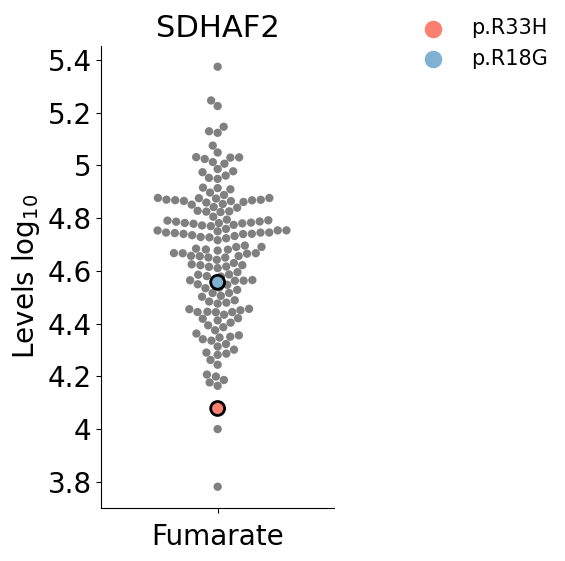

In [61]:
querygenemetabolite("SDHAF2", 59, "Fumarate")

        MutationAA
ID                
IGROV-1     p.A45T
A-549      p.G464V


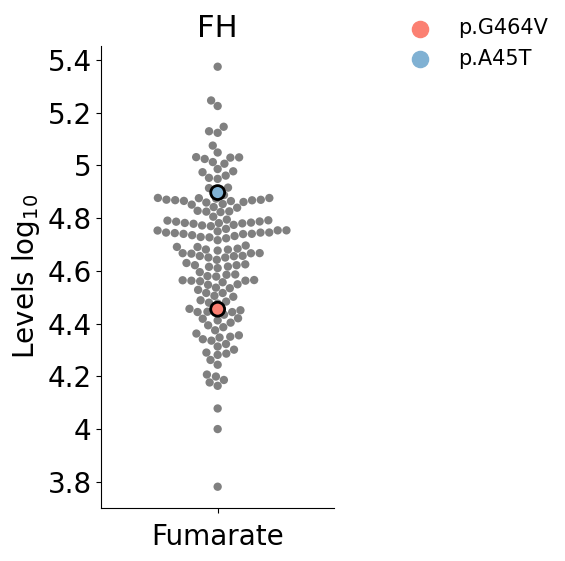

In [62]:
querygenemetabolite("FH", 59, "Fumarate")

         MutationAA
ID                 
SK-MEL-2    p.V667A


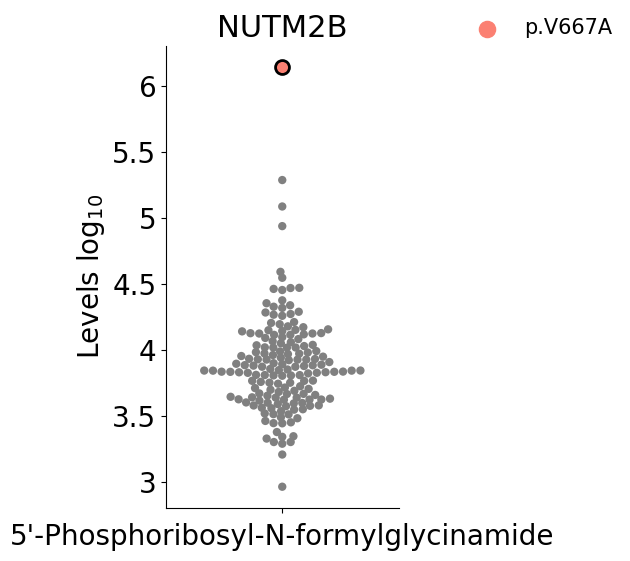

In [93]:
querygenemetabolite("NUTM2B", 488, "5'-Phosphoribosyl-N-formylglycinamide")

         MutationAA
ID                 
SK-MEL-2    p.V667A


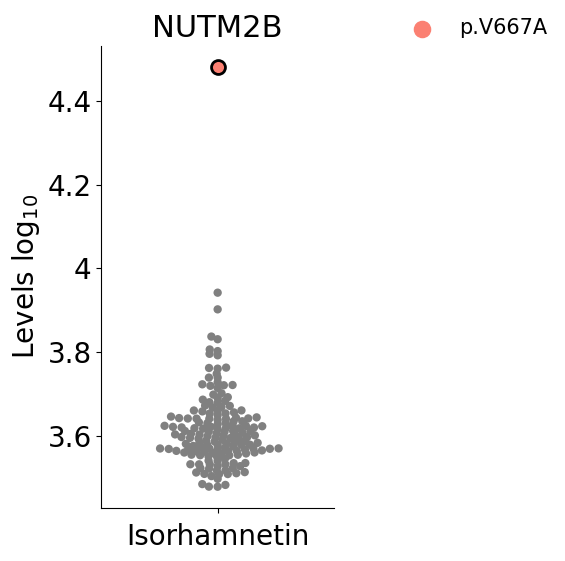

In [94]:
querygenemetabolite("NUTM2B", 492, "Isorhamnetin")

         MutationAA
ID                 
NCI-H146      p.R9C


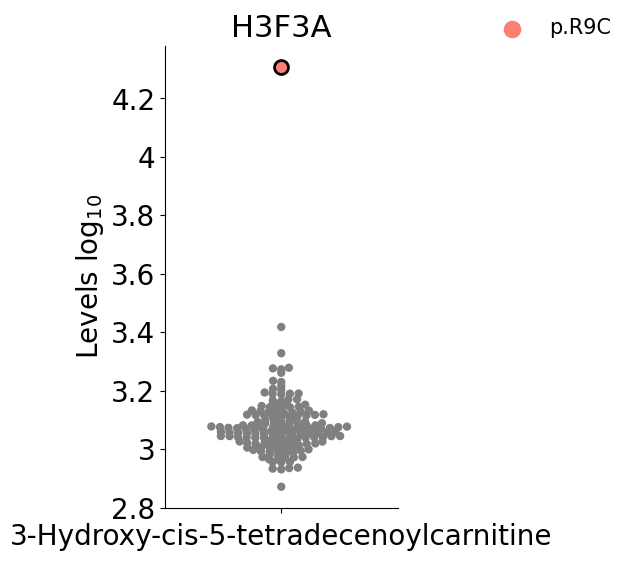

In [95]:
querygenemetabolite("H3F3A", 617, "3-Hydroxy-cis-5-tetradecenoylcarnitine")

         MutationAA
ID                 
NCI-H146      p.R9C


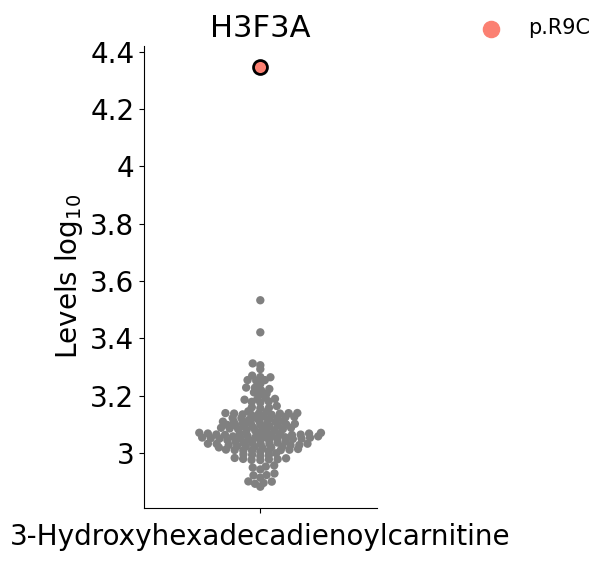

In [96]:
querygenemetabolite("H3F3A", 653, "3-Hydroxyhexadecadienoylcarnitine")

In [18]:
def querygenesfratio(gene, label = "Succinate:Fumarate Ratio"):
    # Get celline ids with a mutation (non silent)
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"].notna()]
    gene_of_interest_celllines = set(gene_of_interest["CellLineName_Cellosaurus"])
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["dsIdx"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["dsIdx"].tolist()
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
    
    mutationdict = dict(zip(gene_of_interest["CellLineName_Cellosaurus"],gene_of_interest["AA_Mutation"]))
    celllines_mutated = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]
    mutation_aa = celllines_mutated["ID"].map(mutationdict)
    
    ## Get the metabolomics data
    mutated_celllines = metabolomics_data[cellines_with_mutation].transpose()
    nonmutated_celllines = metabolomics_data[cellines_without_mutation].transpose()
    
    mutated_celllines["Mutation"] = 1
    mutated_celllines["MutationAA"] = mutation_aa.values
    nonmutated_celllines["Mutation"] = 0
    nonmutated_celllines["MutationAA"] = "WT"
    
    celllines_labeled = pd.concat([mutated_celllines, nonmutated_celllines])
    celllines_labeled.index = celllines_labeled.index.map(str)
    
    celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].unique()
    celllines_labeled["S_F_ratio"] = celllines_labeled[65]/celllines_labeled[59]
    gene_ranked = celllines_labeled.sort_values(by ="S_F_ratio").reset_index()
    querygenesfratio.celllines_labeled = celllines_labeled
    gene_ranked["index"] = gene_ranked.index
    mutationonly = gene_ranked[gene_ranked["Mutation"] == 1]
    nomutation = gene_ranked[gene_ranked["Mutation"] == 0]
    
    matplotlib.rcParams['figure.figsize'] = [8, 10]
    palette = sns.color_palette("Set3", 10)
    g1 = sns.swarmplot(y= np.log10(nomutation["S_F_ratio"]), color = "grey", zorder =1)
    g = sns.swarmplot(y= np.log10(mutationonly["S_F_ratio"]), size = 10, hue = mutationonly["MutationAA"],
                  palette = palette, edgecolor = "k", linewidth= 2, zorder = 3, x=[""]*len(mutationonly))

    sns.despine()

    g.set_ylabel("log$_{10}$ ratio", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
    g.set_yticklabels(g.get_yticks(), size = 20)
    g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    g.set_xlabel(label, size = 20)
    g.set_title(gene, size = 22)
    g.legend(prop={"size":15}, frameon = False, markerscale = 1.5)
    savename = gene + "_succinate_fumartate_ratio_mutations.png"
    plt.savefig(savename, dpi = 400)

In [76]:
def querygenesfratio2(gene, label = "Succinate:Fumarate Ratio", palette = "Set3"):
    # Get celline ids with a mutation (non silent)
    gene_of_interest = celllines_mutations[celllines_mutations["HGNC"] == gene]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"] != "Silent"]
    gene_of_interest = gene_of_interest[gene_of_interest["MutationType"].notna()]
    gene_of_interest_celllines = set(gene_of_interest["CellLineName_Cellosaurus"])
    
    
    ## Get the cell lines with mutations
    cellines_with_mutation = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
    cellines_without_mutation = celllines_mapped_mutations[~celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].tolist()
#    cellines_with_mutation = list(set([str(x) for x in cellines_with_mutation]))
#    cellines_without_mutation = list(set([str(x) for x in cellines_without_mutation]))
    
    cellines_with_mutation = [str(x) for x in cellines_with_mutation]
    cellines_without_mutation = [str(x) for x in cellines_without_mutation]
  
    
    mutationdict = dict(zip(gene_of_interest["CellLineName_Cellosaurus"],gene_of_interest["AA_Mutation"]))
    celllines_mutated = celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]
    mutation_aa = celllines_mutated["ID"].map(mutationdict)

    ## Get the metabolomics data
    mutated_celllines = averaged[cellines_with_mutation].transpose()
    nonmutated_celllines = averaged[cellines_without_mutation].transpose()
    
    mutated_celllines["Mutation"] = 1
    mutated_celllines["MutationAA"] = mutation_aa.values
    print(mutated_celllines[["MutationAA"]].drop_duplicates())
    nonmutated_celllines["Mutation"] = 0
    nonmutated_celllines["MutationAA"] = "WT"
    
    celllines_labeled = pd.concat([mutated_celllines, nonmutated_celllines])
    celllines_labeled.index = celllines_labeled.index.map(str)
    
    celllines_labeled["S_F_ratio"] = celllines_labeled[65]/celllines_labeled[59]
    gene_ranked = celllines_labeled.sort_values(by ="S_F_ratio").reset_index()

  
    celllines_mapped_mutations[celllines_mapped_mutations["ID"].isin(gene_of_interest_celllines)]["ID"].unique()
    
    gene_ranked["index"] = gene_ranked.index
    mutationonly = gene_ranked[gene_ranked["Mutation"] == 1].drop_duplicates(subset = "ID")
    nomutation = gene_ranked[gene_ranked["Mutation"] == 0].drop_duplicates(subset = "ID")
        
    matplotlib.rcParams['figure.figsize'] = [3, 6]
    palette = sns.color_palette(palette, 10)[3:]
    g1 = sns.swarmplot(y= np.log10(nomutation["S_F_ratio"]), color = "grey", zorder =1, size = 6)
    g = sns.swarmplot(y= np.log10(mutationonly["S_F_ratio"]), size = 10, hue = mutationonly["MutationAA"],
                  palette = palette, edgecolor = "k", linewidth= 2, zorder = 3, x=[""]*len(mutationonly))

    sns.despine()

    g.set_ylabel("Levels log$_{10}$", size = 20)
    #g.set_yticks([4, 4.5,5,5.5])
    g.set_yticklabels(g.get_yticks(), size = 20)
    g.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    g.set_xlabel(label, size = 20)
    g.set_title(gene, size = 22)
    g.legend(prop={"size":15}, frameon = False, markerscale = 1.5, bbox_to_anchor=(1.5, 0.6, 0.5, 0.5))
    savename = gene + "_" + label + "_averaged_succinate_fumartate_ratio_mutations.png"
    plt.savefig(savename, dpi = 400, bbox_inches = "tight")
    plt.show()

          MutationAA
ID                  
HOP-62       p.L318F
COR-L279      p.T87R
SN12C        p.R352Q
NCI-H510A    p.G448C
LOX-IMVI     p.D275H
SK-LU-1      p.Q614E
A-427        p.P658L
NCI-H23       p.A69T
CCRF-CEM     p.A488T


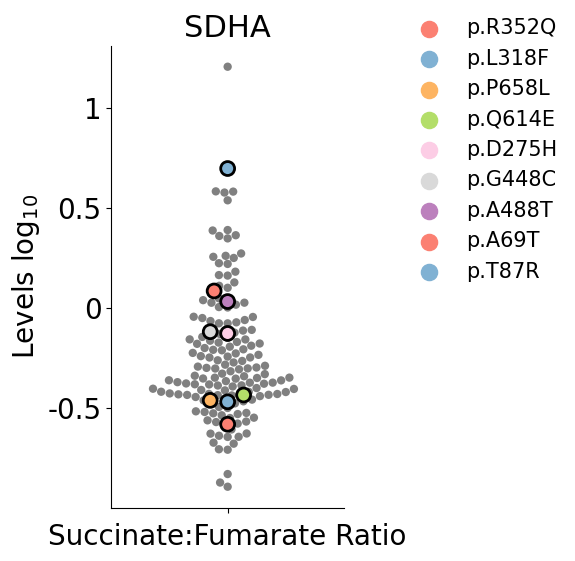

In [69]:
querygenesfratio2("SDHA")

          MutationAA
ID                  
NCI-H2342    p.C253S


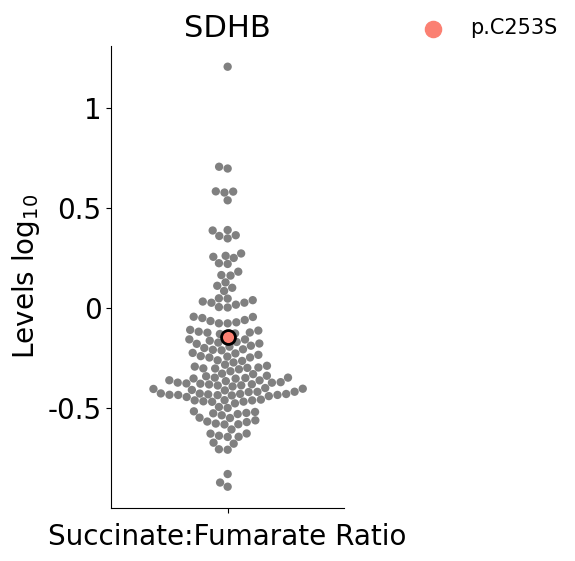

In [71]:
querygenesfratio2("SDHB")

          MutationAA
ID                  
NCI-H1838     p.R50H
5637          p.L63V
NCI-H82       p.M87V


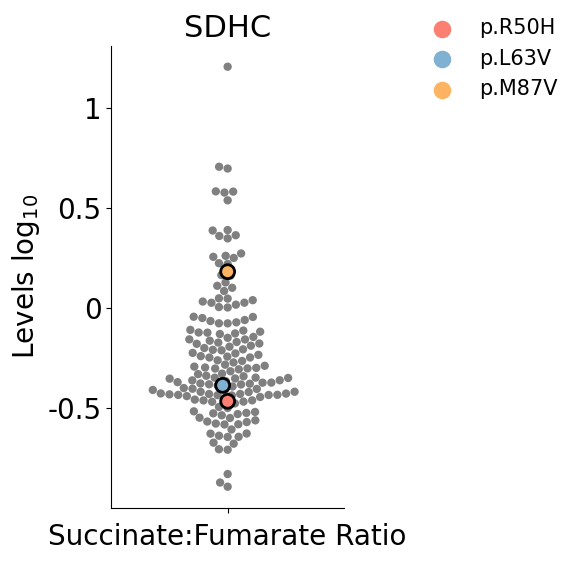

In [72]:
querygenesfratio2("SDHC")

           MutationAA
ID                   
MOLT-4         p.R33H
MDA-MB-157     p.R18G


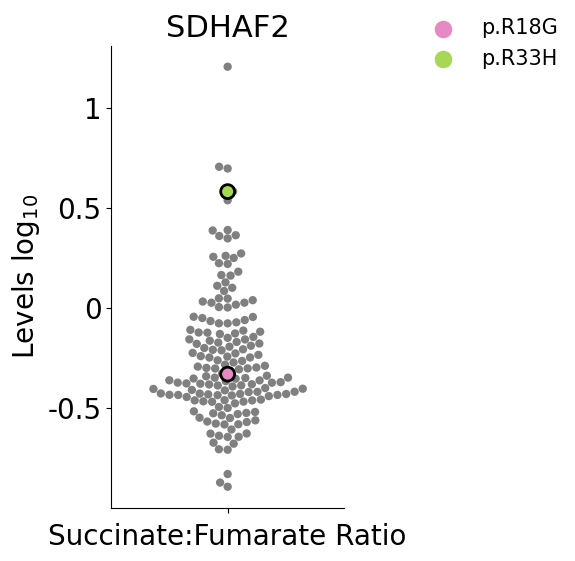

In [79]:
querygenesfratio2("SDHAF2", palette = "Set2")

In [23]:
mutationonly = querygenesfratio.celllines_labeled[querygenesfratio.celllines_labeled["Mutation"] == 1]
nomutation = querygenesfratio.celllines_labeled[querygenesfratio.celllines_labeled["Mutation"] == 0]